# PDF Features Analysis

This notebook analyzes PDF features extracted from PDF files, which are used for malware detection and classification.

## 1. Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set up visualization settings
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [18]:
# Load the dataset
df = pd.read_csv('/home/nhat/projectcuoiky/data/pdf_features.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (11101, 25)


,Page,Encrypt,ObjStm,JS,JavaScript,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,...,endobj,stream,endstream,xref,trailer,startxref,filepath,filename,filesize_kb,label
0,1,0,0,0,0,0,0,0,0,0,...,11,3,3,2,2,2,/home/remnux/Desktop/extraction/data/Benign/as...,assehc.pdf,23.120117,benign
1,1,0,0,0,0,0,0,0,0,0,...,6,2,2,1,1,1,/home/remnux/Desktop/extraction/data/Benign/ar...,artauthor.pdf,69.544922,benign
2,4,0,6,0,0,0,0,0,0,0,...,56,41,41,0,0,3,/home/remnux/Desktop/extraction/data/Benign/p4...,p4894_ru.pdf,180.786133,benign
3,1,0,0,0,0,0,0,1,0,0,...,29,17,17,2,2,2,/home/remnux/Desktop/extraction/data/Benign/ar...,artisticwall.pdf,85.124023,benign
4,6,0,25,0,0,0,0,2,0,0,...,156,146,146,0,0,4,/home/remnux/Desktop/extraction/data/Benign/f9...,f990sn.pdf,126.099609,benign


## 2. Data Overview and Preprocessing

In [4]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Page             0
Encrypt          0
ObjStm           0
JS               0
JavaScript       0
AA               0
OpenAction       0
AcroForm         0
JBIG2Decode      0
RichMedia        0
Launch           0
EmbeddedFile     0
XFA              0
Colors_gt_224    0
obj              0
endobj           0
stream           0
endstream        0
xref             0
trailer          0
startxref        0
filepath         0
filename         0
filesize_kb      0
label            0
dtype: int64


In [5]:
# Data types and basic statistics
print("Data types:")
print(df.dtypes)

print("\nBasic statistics for numeric columns:")
df.describe()

Data types:
Page               int64
Encrypt            int64
ObjStm             int64
JS                 int64
JavaScript         int64
AA                 int64
OpenAction         int64
AcroForm           int64
JBIG2Decode        int64
RichMedia          int64
Launch             int64
EmbeddedFile       int64
XFA                int64
Colors_gt_224      int64
obj                int64
endobj             int64
stream             int64
endstream          int64
xref               int64
trailer            int64
startxref          int64
filepath          object
filename          object
filesize_kb      float64
label             object
dtype: object

Basic statistics for numeric columns:


,Page,Encrypt,ObjStm,JS,JavaScript,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,...,XFA,Colors_gt_224,obj,endobj,stream,endstream,xref,trailer,startxref,filesize_kb
count,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000,...,11101.000000,11101.0,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000
mean,5.740023,0.011891,2.581119,0.353752,0.470498,0.269705,0.156292,0.411134,0.040357,0.002793,...,0.007207,0.0,83.470318,83.433565,27.325556,27.316278,1.511305,1.535447,1.907756,104.395727
std,21.522345,0.127495,6.495683,4.753679,4.799377,5.306264,0.387395,0.750230,0.495377,0.052773,...,0.094642,0.0,310.786779,310.792546,53.711421,53.713446,1.366716,1.369399,1.144023,396.712313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023438
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,15.000000,15.000000,4.000000,4.000000,1.000000,1.000000,1.000000,25.104492
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,37.000000,37.000000,13.000000,13.000000,2.000000,2.000000,2.000000,66.790039
75%,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,81.000000,81.000000,30.000000,30.000000,2.000000,2.000000,2.000000,114.116211
max,1966.000000,2.000000,108.000000,404.000000,404.000000,213.000000,8.000000,15.000000,14.000000,1.000000,...,5.000000,0.0,22625.000000,22625.000000,2063.000000,2063.000000,46.000000,46.000000,39.000000,23258.375000


Label distribution:
label
benign       9107
malicious    1994
Name: count, dtype: int64


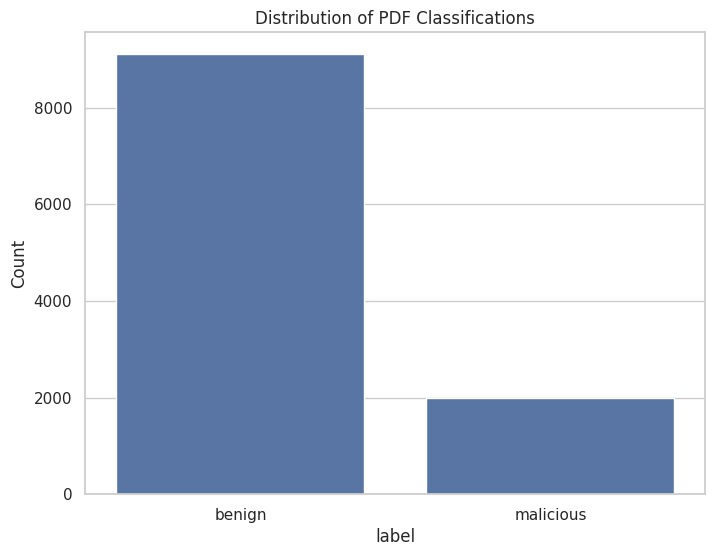

In [19]:
# Check distribution of classes
print("Label distribution:")
label_counts = df['label'].value_counts()
print(label_counts)

# Visualize label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of PDF Classifications')
plt.ylabel('Count')
plt.show()

## 3. Feature Analysis

In [7]:
# Extract relevant features (removing filepath, filename)
feature_cols = df.columns.drop(['filepath', 'filename', 'label'])

# Create a dataframe with just the features and label
features_df = df[feature_cols].join(df['label'])

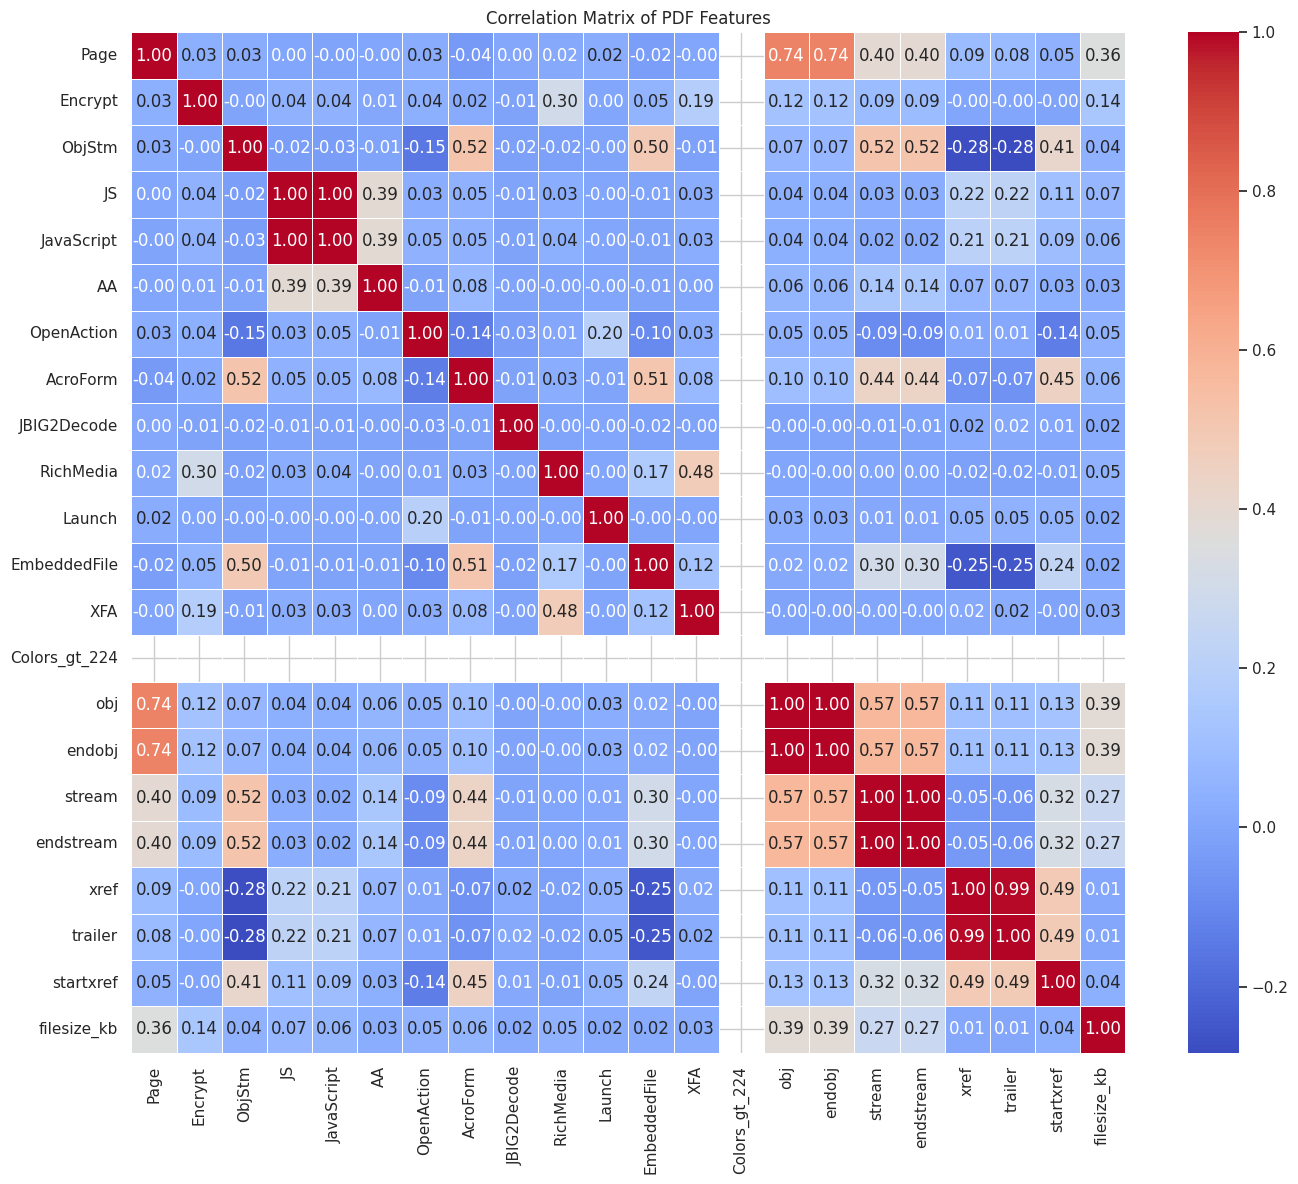

In [9]:
# Correlation matrix - exclude the label column since it's non-numeric
correlation = df[feature_cols].corr()  # Only include numeric columns

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of PDF Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

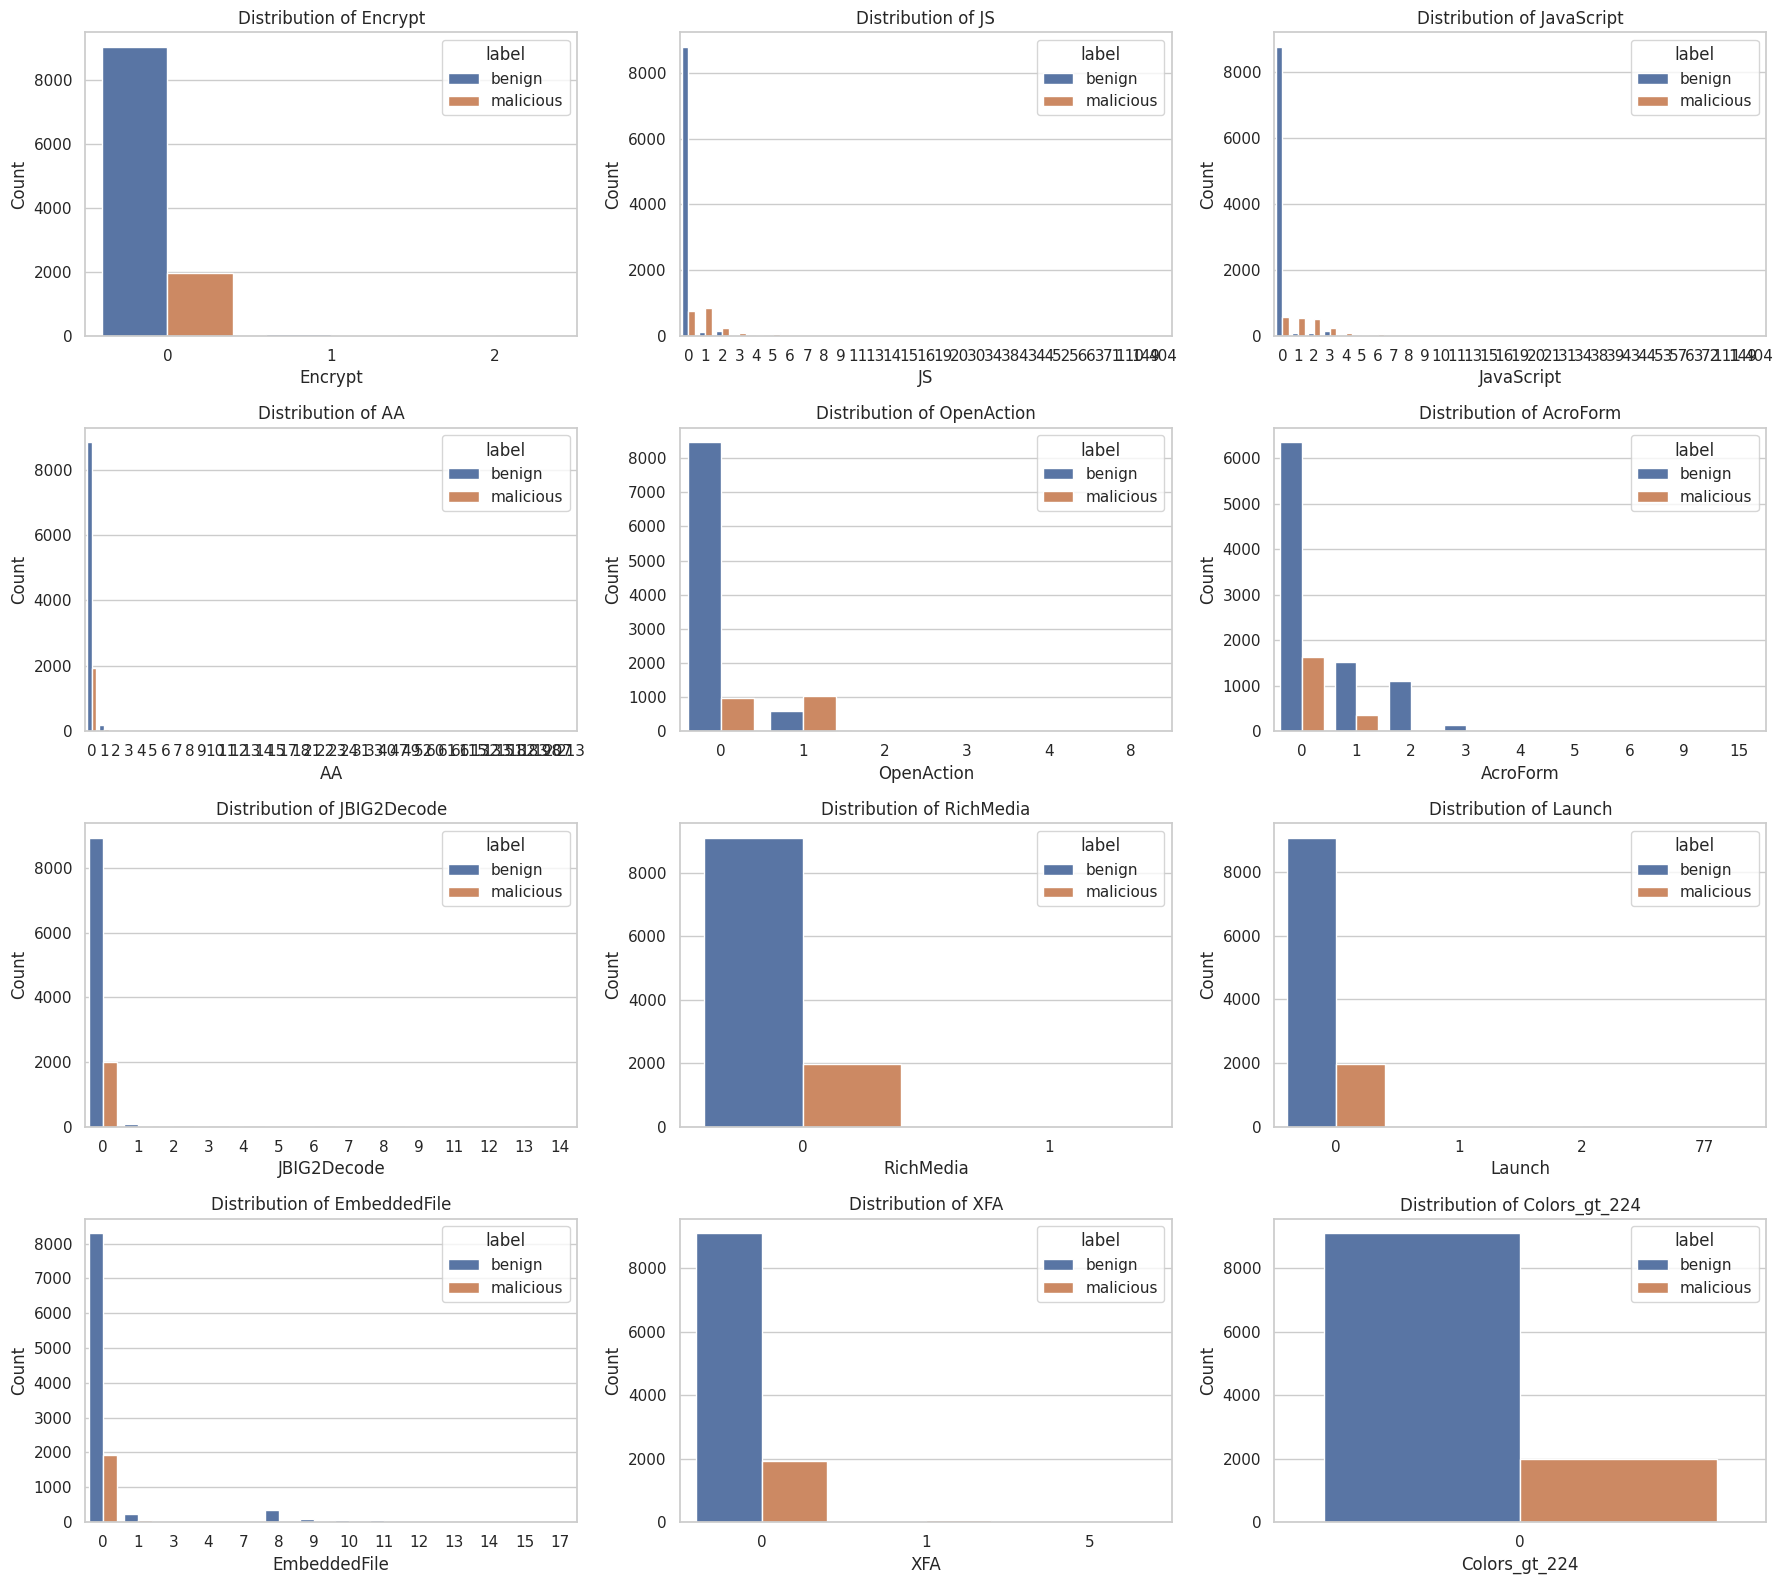

In [10]:
# Analyze binary features (0/1)
binary_features = ['Encrypt', 'JS', 'JavaScript', 'AA', 'OpenAction', 'AcroForm', 
                   'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA', 
                   'Colors_gt_224']

# Create a figure with subplots for each binary feature
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, feature in enumerate(binary_features):
    # Create a count plot for each feature, split by label if more than one label exists
    if len(label_counts) > 1:
        sns.countplot(x=feature, hue='label', data=features_df, ax=axes[i])
    else:
        sns.countplot(x=feature, data=features_df, ax=axes[i])
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('Count')
    
plt.tight_layout()
plt.show()

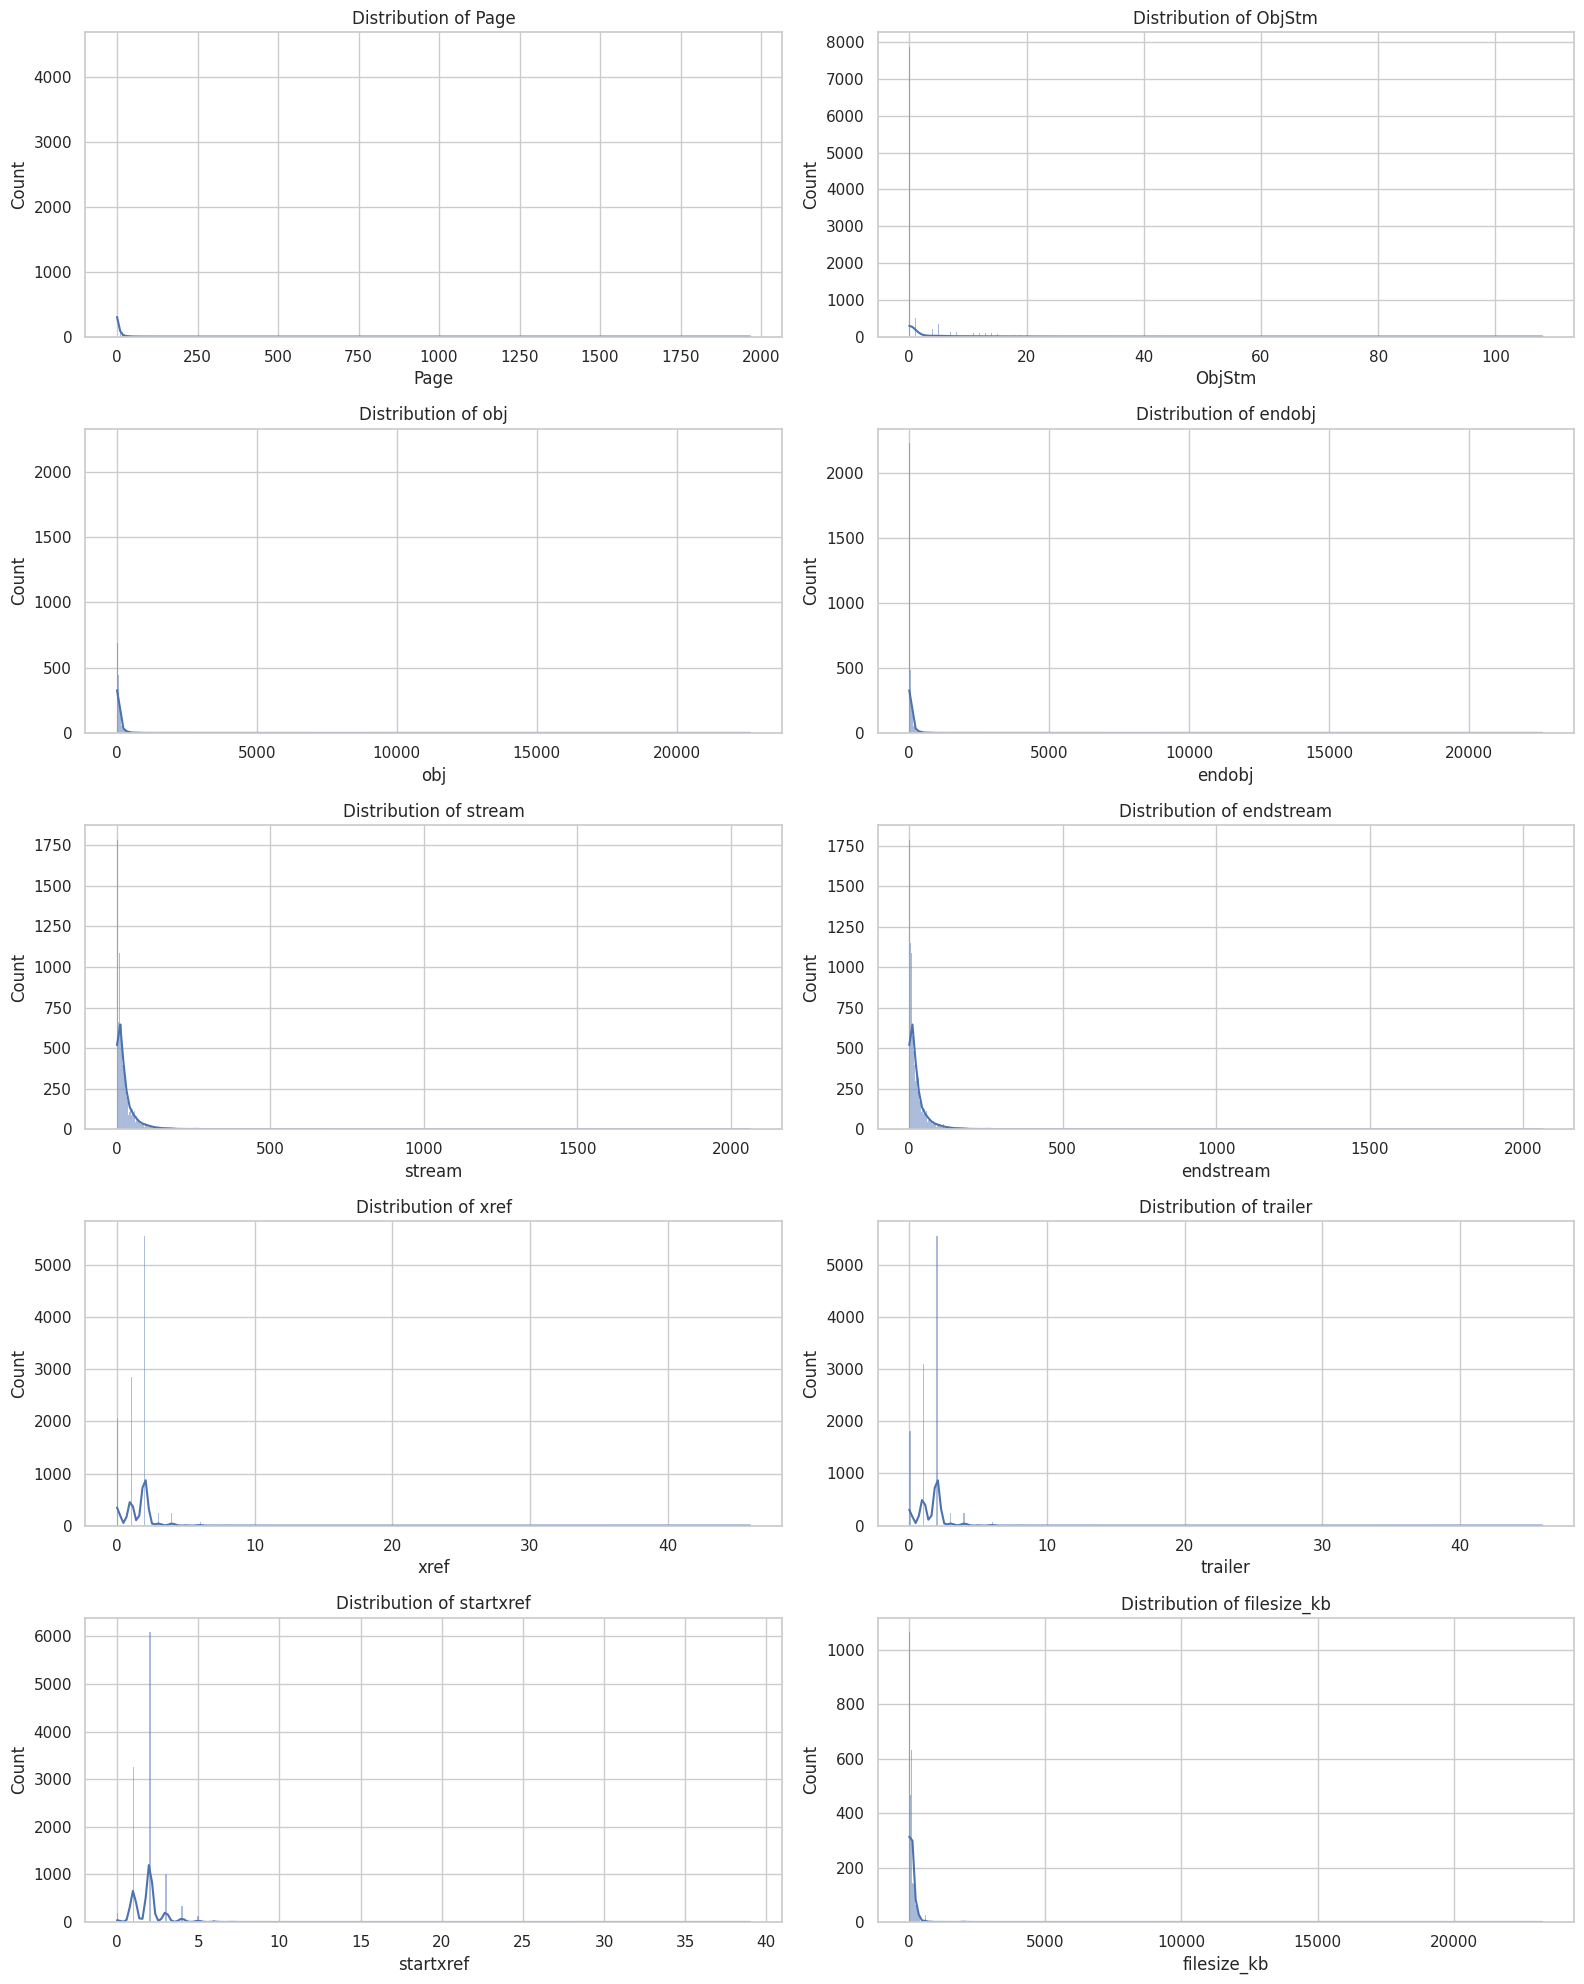

In [11]:
# Analyze count features (Page, ObjStm, etc.)
count_features = ['Page', 'ObjStm', 'obj', 'endobj', 'stream', 'endstream', 
                  'xref', 'trailer', 'startxref', 'filesize_kb']

# Distribution of count features
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for i, feature in enumerate(count_features):
    # Create histograms for each numeric feature
    sns.histplot(data=features_df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

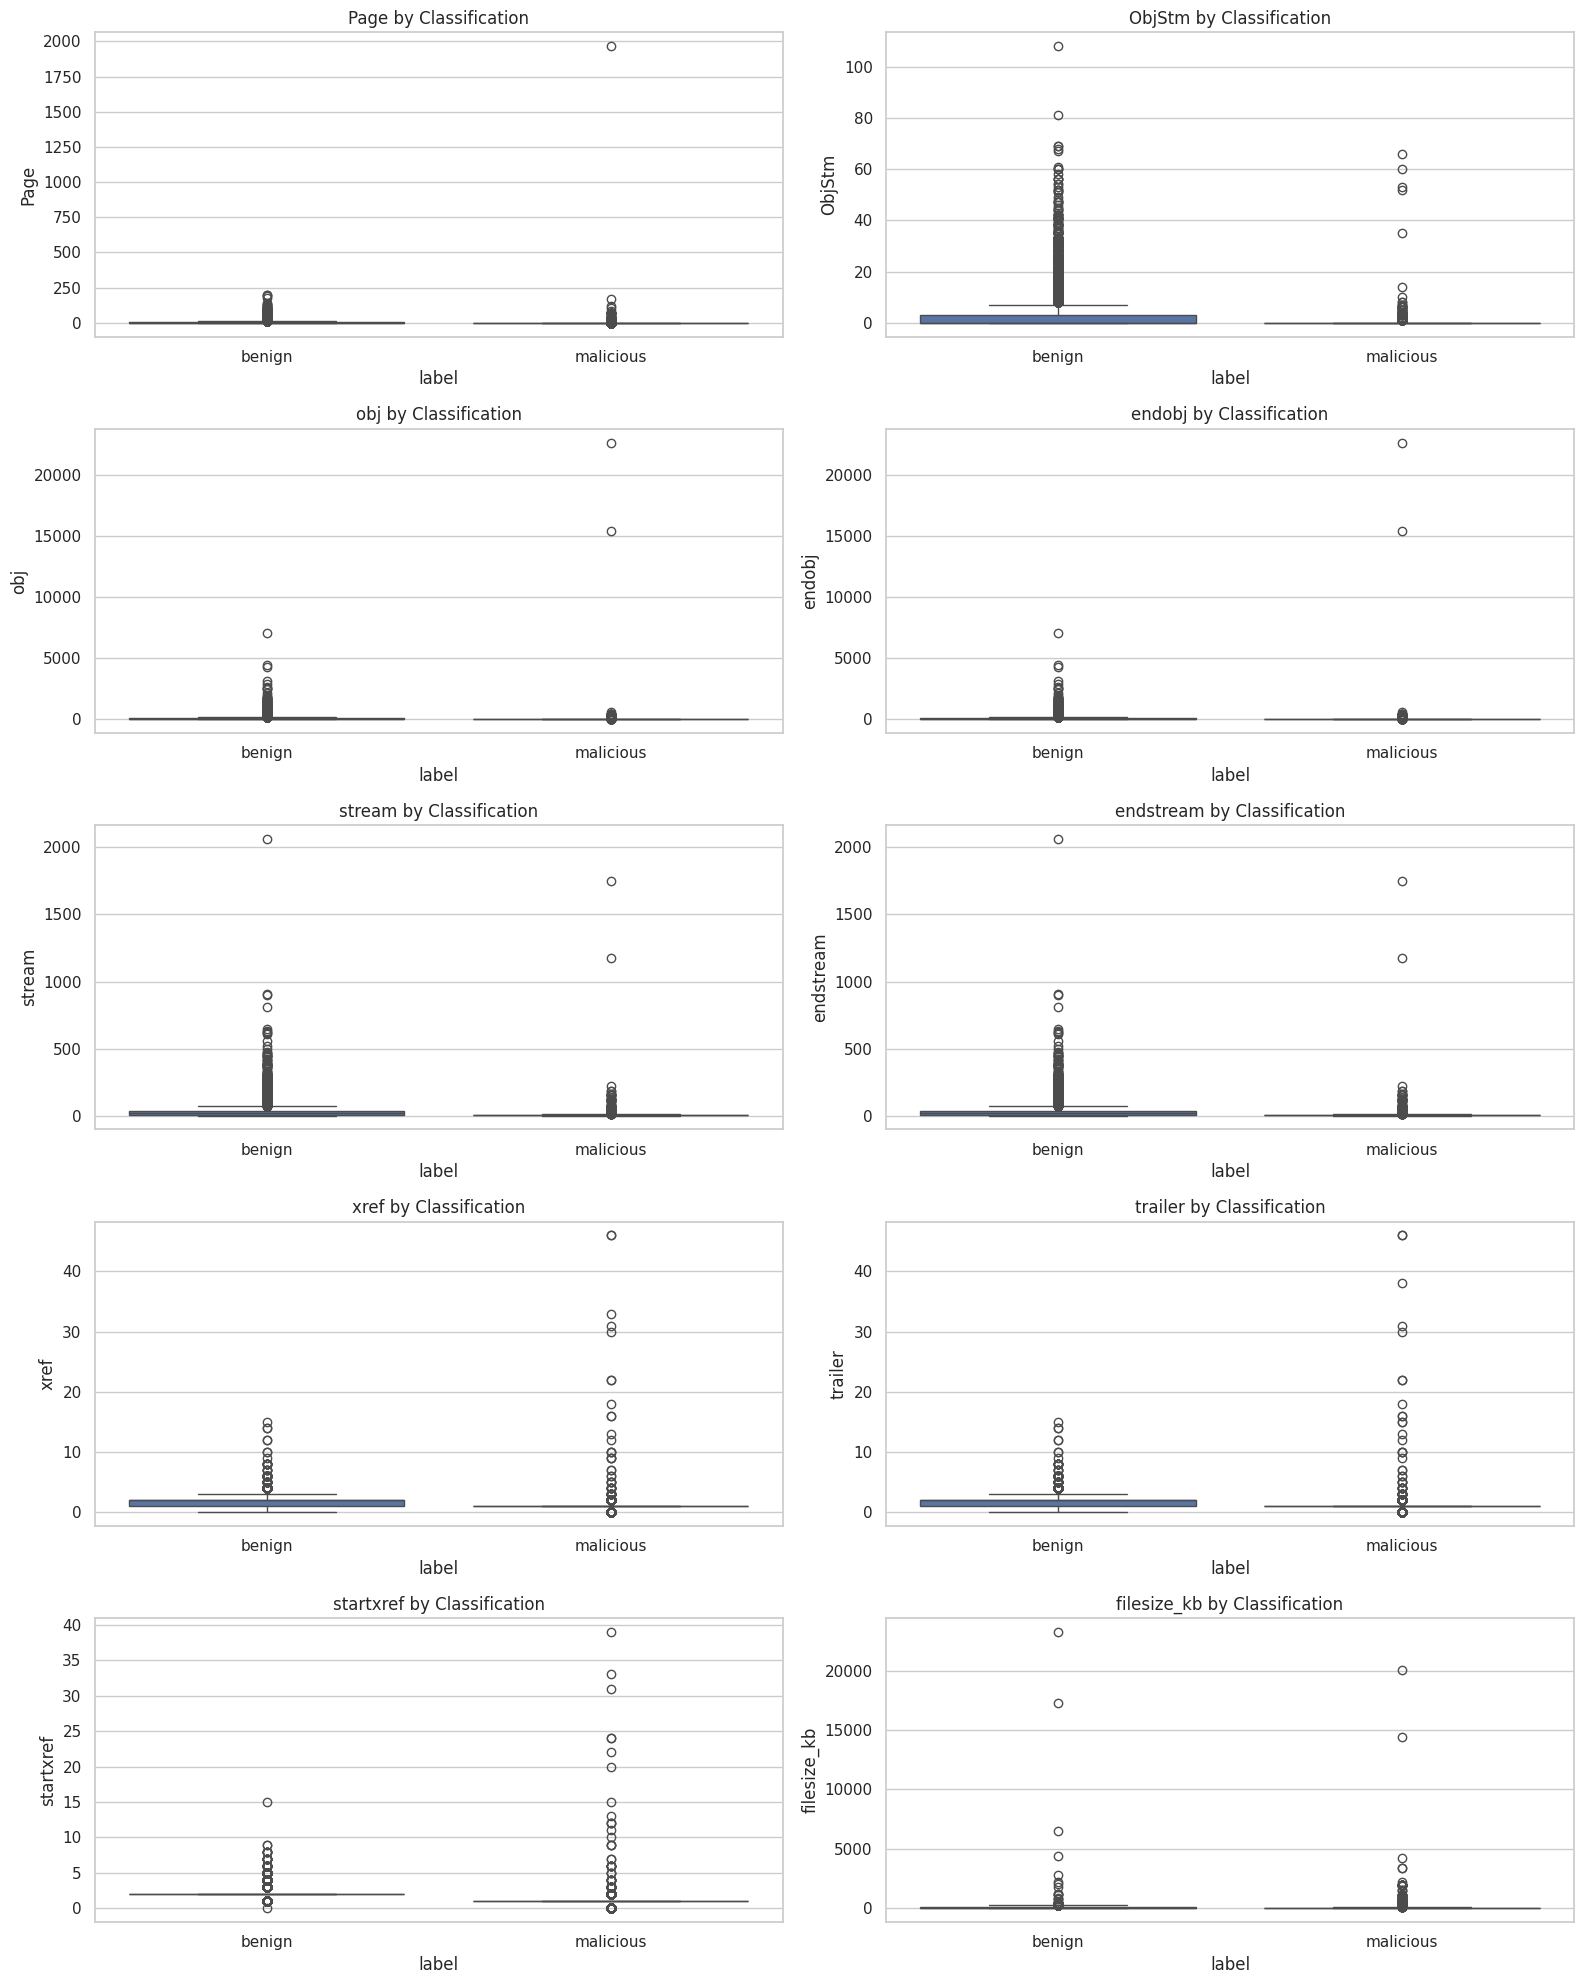

In [12]:
# Box plots for count features by label (if multiple labels exist)
if len(label_counts) > 1:
    fig, axes = plt.subplots(5, 2, figsize=(16, 20))
    axes = axes.flatten()
    
    for i, feature in enumerate(count_features):
        sns.boxplot(x='label', y=feature, data=features_df, ax=axes[i])
        axes[i].set_title(f'{feature} by Classification')
        
    plt.tight_layout()
    plt.show()

## 4. Feature Importance Analysis

If the dataset contains multiple classes, we can use machine learning to determine which features are most important for classification.

Top 10 most important features:
        Feature  Importance
4    JavaScript    0.194272
21  filesize_kb    0.150462
3            JS    0.108996
20    startxref    0.082627
6    OpenAction    0.072056
15       endobj    0.067964
14          obj    0.061302
18         xref    0.045161
17    endstream    0.044595
19      trailer    0.042826


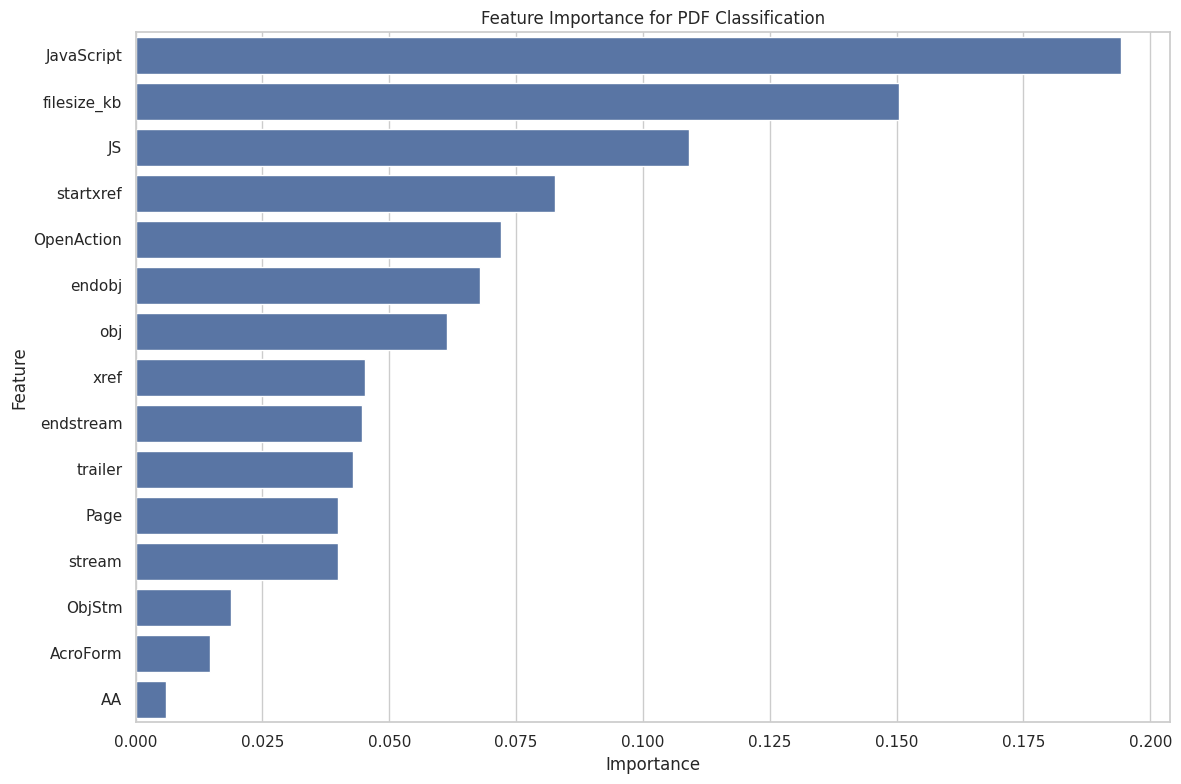


Classification Report:
              precision    recall  f1-score   support

      benign       0.99      0.99      0.99      2749
   malicious       0.97      0.95      0.96       582

    accuracy                           0.99      3331
   macro avg       0.98      0.97      0.97      3331
weighted avg       0.99      0.99      0.99      3331



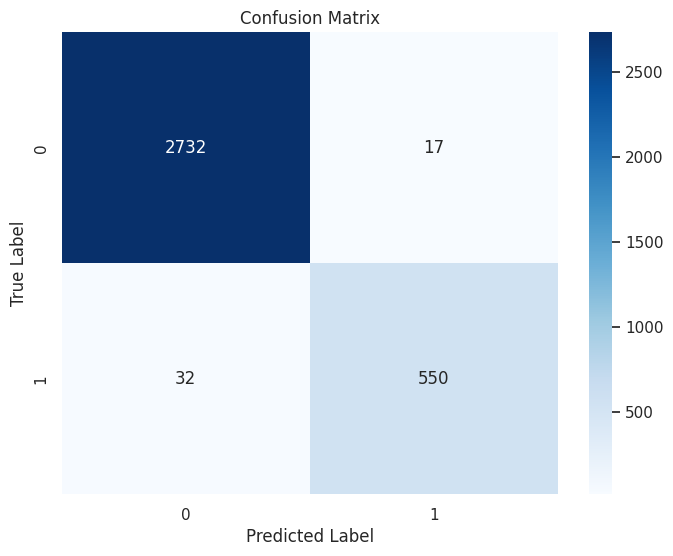

In [13]:
# Check if we have multiple classes for classification
if len(label_counts) > 1:
    # Prepare data for modeling
    X = df.drop(['filepath', 'filename', 'label'], axis=1)
    y = df['label']  # String labels 'benign' and 'malicious' are acceptable for RandomForest
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize and train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Get feature importances
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': clf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Display feature importances
    print("Top 10 most important features:")
    print(feature_importances.head(10))
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
    plt.title('Feature Importance for PDF Classification')
    plt.tight_layout()
    plt.show()
    
    # Evaluate model performance
    y_pred = clf.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

## 5. Statistical Analysis of Key Features

In [14]:
# Statistical analysis of JavaScript-related features
js_features = df[df['JS'] == 1]
print(f"Number of PDFs with JavaScript: {len(js_features)}")

if len(js_features) > 0:
    print("\nStatistics for PDFs with JavaScript:")
    print(js_features.describe())
    
    if len(label_counts) > 1:
        print("\nLabel distribution for PDFs with JavaScript:")
        print(js_features['label'].value_counts())

Number of PDFs with JavaScript: 952

Statistics for PDFs with JavaScript:
             Page     Encrypt      ObjStm     JS  JavaScript          AA  \
count  952.000000  952.000000  952.000000  952.0  952.000000  952.000000   
mean     3.907563    0.007353    0.419118    1.0    1.572479    0.648109   
std     10.370521    0.097003    2.621951    0.0    0.570018    9.014366   
min      0.000000    0.000000    0.000000    1.0    0.000000    0.000000   
25%      1.000000    0.000000    0.000000    1.0    1.000000    0.000000   
50%      1.000000    0.000000    0.000000    1.0    2.000000    0.000000   
75%      2.250000    0.000000    0.000000    1.0    2.000000    0.000000   
max    168.000000    2.000000   52.000000    1.0    6.000000  198.000000   

       OpenAction    AcroForm  JBIG2Decode   RichMedia  ...         XFA  \
count  952.000000  952.000000   952.000000  952.000000  ...  952.000000   
mean     0.525210    0.305672     0.014706    0.007353  ...    0.031513   
std      0.50172

In [15]:
# Analyze other potentially suspicious features
suspicious_features = ['OpenAction', 'AA', 'Launch', 'RichMedia', 'EmbeddedFile']

for feature in suspicious_features:
    feature_present = df[df[feature] == 1]
    print(f"\nNumber of PDFs with {feature}: {len(feature_present)}")
    
    if len(feature_present) > 0 and len(label_counts) > 1:
        print(f"Label distribution for PDFs with {feature}:")
        print(feature_present['label'].value_counts())


Number of PDFs with OpenAction: 1624
Label distribution for PDFs with OpenAction:
label
malicious    1021
benign        603
Name: count, dtype: int64

Number of PDFs with AA: 235
Label distribution for PDFs with AA:
label
benign       183
malicious     52
Name: count, dtype: int64

Number of PDFs with Launch: 35
Label distribution for PDFs with Launch:
label
malicious    25
benign       10
Name: count, dtype: int64

Number of PDFs with RichMedia: 31
Label distribution for PDFs with RichMedia:
label
malicious    31
Name: count, dtype: int64

Number of PDFs with EmbeddedFile: 272
Label distribution for PDFs with EmbeddedFile:
label
benign       226
malicious     46
Name: count, dtype: int64


## 6. Advanced Analysis: Feature Combinations

In [16]:
# Create new features based on combinations
df['js_related'] = (df['JS'] + df['JavaScript']) > 0
df['suspicious_actions'] = (df['OpenAction'] + df['AA'] + df['Launch']) > 0
df['has_forms'] = (df['AcroForm'] + df['XFA']) > 0

# Analyze combinations
print("PDFs with JavaScript-related features:")
print(df['js_related'].value_counts())

print("\nPDFs with suspicious actions:")
print(df['suspicious_actions'].value_counts())

print("\nPDFs with forms:")
print(df['has_forms'].value_counts())

PDFs with JavaScript-related features:
js_related
False    9312
True     1789
Name: count, dtype: int64

PDFs with suspicious actions:
suspicious_actions
False    9137
True     1964
Name: count, dtype: int64

PDFs with forms:
has_forms
False    7984
True     3117
Name: count, dtype: int64


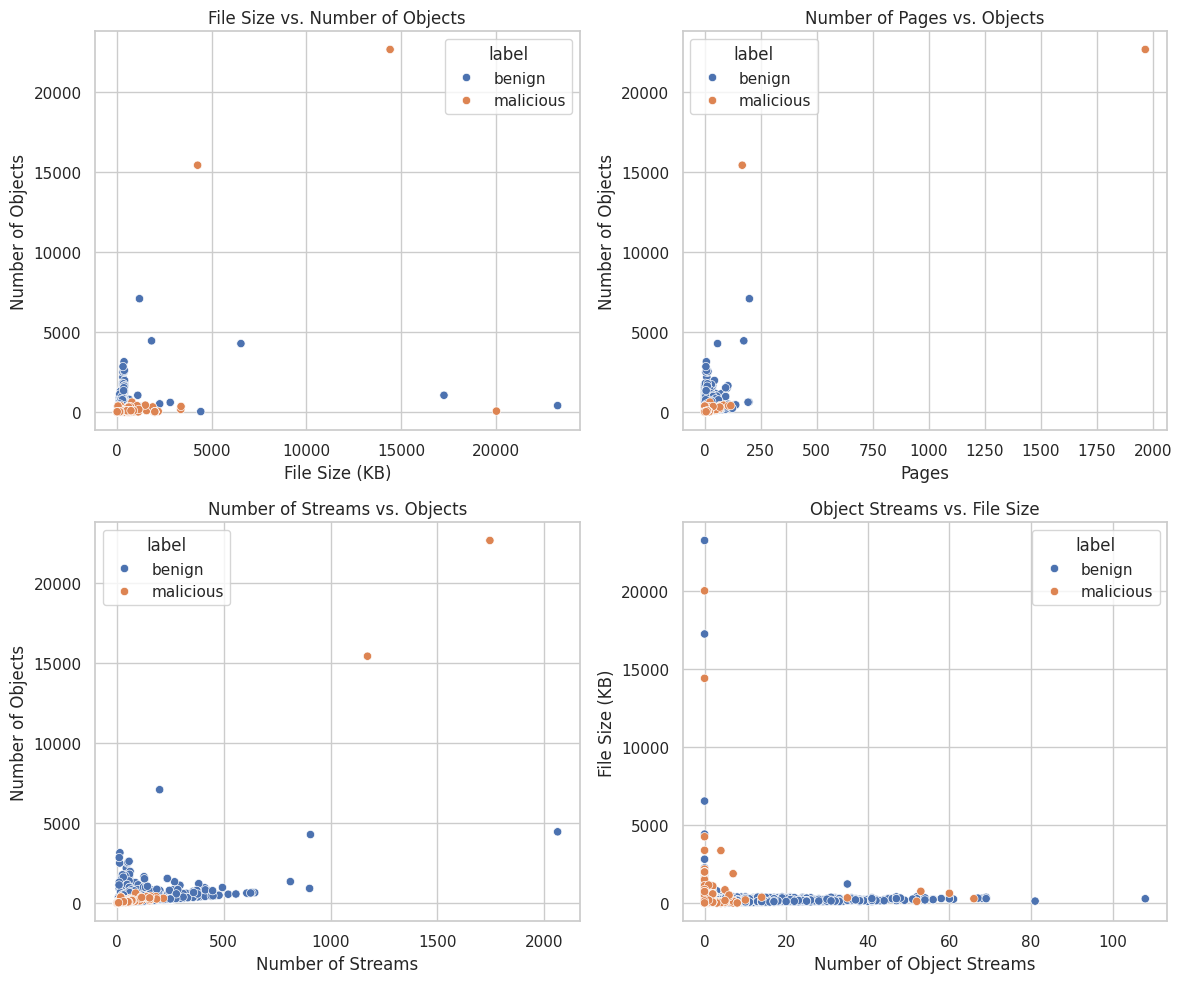

In [17]:
# Create scatter plots for interesting feature pairs
plt.figure(figsize=(12, 10))

# File size vs. number of objects
plt.subplot(2, 2, 1)
if len(label_counts) > 1:
    sns.scatterplot(x='filesize_kb', y='obj', hue='label', data=df)
else:
    sns.scatterplot(x='filesize_kb', y='obj', data=df)
plt.title('File Size vs. Number of Objects')
plt.xlabel('File Size (KB)')
plt.ylabel('Number of Objects')

# Pages vs. objects
plt.subplot(2, 2, 2)
if len(label_counts) > 1:
    sns.scatterplot(x='Page', y='obj', hue='label', data=df)
else:
    sns.scatterplot(x='Page', y='obj', data=df)
plt.title('Number of Pages vs. Objects')
plt.xlabel('Pages')
plt.ylabel('Number of Objects')

# Stream vs. objects
plt.subplot(2, 2, 3)
if len(label_counts) > 1:
    sns.scatterplot(x='stream', y='obj', hue='label', data=df)
else:
    sns.scatterplot(x='stream', y='obj', data=df)
plt.title('Number of Streams vs. Objects')
plt.xlabel('Number of Streams')
plt.ylabel('Number of Objects')

# ObjStm vs. filesize
plt.subplot(2, 2, 4)
if len(label_counts) > 1:
    sns.scatterplot(x='ObjStm', y='filesize_kb', hue='label', data=df)
else:
    sns.scatterplot(x='ObjStm', y='filesize_kb', data=df)
plt.title('Object Streams vs. File Size')
plt.xlabel('Number of Object Streams')
plt.ylabel('File Size (KB)')

plt.tight_layout()
plt.show()

## 7. Conclusion and Findings

Based on the analysis, we can draw the following conclusions:

1. **Data Overview**: The dataset contains PDF features extracted from various files, with information about their structure and content.

2. **Key Features**: The most important features for distinguishing PDFs appear to be related to JavaScript presence, embedded files, and certain structural elements.

3. **PDF Structure**: There is a strong correlation between the number of objects, streams, and file size, which is expected in PDF structure.

4. **Potentially Malicious Indicators**: Features like JavaScript, OpenAction, Launch, and embedded files are often associated with malicious PDFs, though they can appear in benign files as well.

5. **Form Features**: A significant number of PDFs contain form elements, which may indicate legitimate PDF documents like tax forms or applications.

These findings provide a foundation for developing more sophisticated PDF malware detection systems by understanding the relationship between PDF features and potential maliciousness.

## 8. Kiểm tra giá trị âm trong các cột quan trọng

Kiểm tra xem các cột số lượng như Page và stream có chứa giá trị âm không, điều này có thể ảnh hưởng đến việc huấn luyện mô hình.

Kiểm tra giá trị âm trong cột Page:
Số lượng mẫu có giá trị âm trong cột Page: 0


Kiểm tra giá trị âm trong cột stream:
Số lượng mẫu có giá trị âm trong cột stream: 0


Giá trị nhỏ nhất của cột Page: 0
Giá trị nhỏ nhất của cột stream: 0


Số lượng mẫu có giá trị 0 trong cột Page: 303
Số lượng mẫu có giá trị 0 trong cột stream: 10


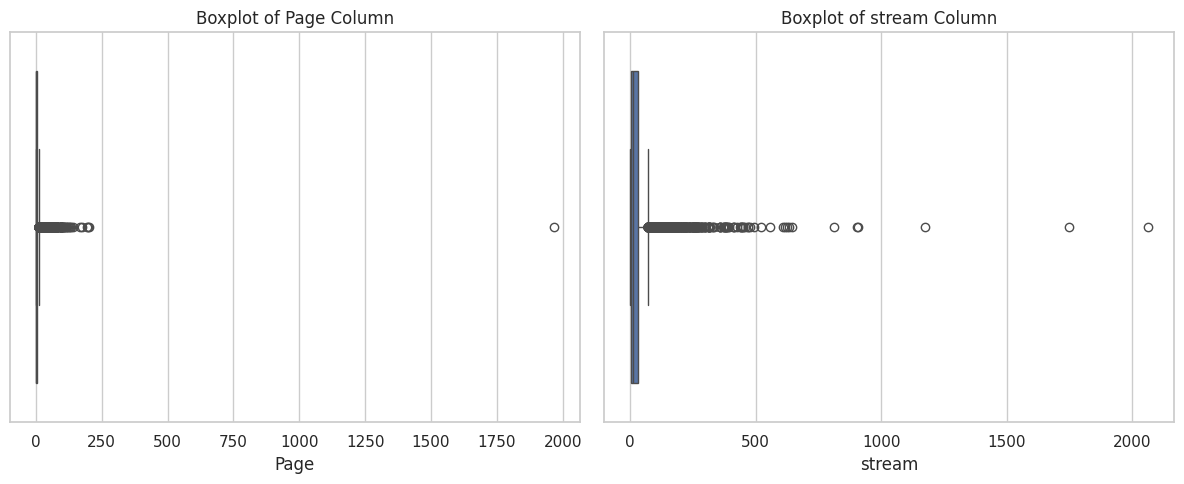

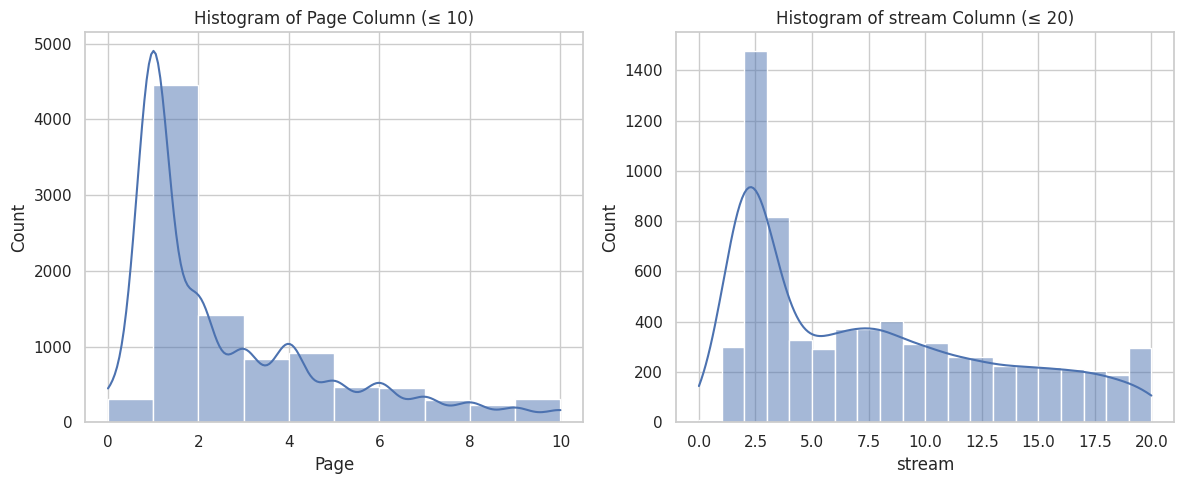

In [20]:
# Kiểm tra giá trị âm trong cột Page và stream
print("Kiểm tra giá trị âm trong cột Page:")
negative_page = df[df['Page'] < 0]
print(f"Số lượng mẫu có giá trị âm trong cột Page: {len(negative_page)}")
if len(negative_page) > 0:
    print("\nCác mẫu có giá trị âm trong cột Page:")
    print(negative_page[['filepath', 'Page', 'label']].head())
    print("\nThống kê về giá trị âm trong cột Page:")
    print(negative_page['Page'].describe())

print("\n" + "="*50)

print("\nKiểm tra giá trị âm trong cột stream:")
negative_stream = df[df['stream'] < 0]
print(f"Số lượng mẫu có giá trị âm trong cột stream: {len(negative_stream)}")
if len(negative_stream) > 0:
    print("\nCác mẫu có giá trị âm trong cột stream:")
    print(negative_stream[['filepath', 'stream', 'label']].head())
    print("\nThống kê về giá trị âm trong cột stream:")
    print(negative_stream['stream'].describe())

# Kiểm tra giá trị nhỏ nhất của cột Page và stream
print("\n" + "="*50)
print("\nGiá trị nhỏ nhất của cột Page:", df['Page'].min())
print("Giá trị nhỏ nhất của cột stream:", df['stream'].min())

# Kiểm tra giá trị 0 trong cột Page và stream
print("\n" + "="*50)
print("\nSố lượng mẫu có giá trị 0 trong cột Page:", len(df[df['Page'] == 0]))
print("Số lượng mẫu có giá trị 0 trong cột stream:", len(df[df['stream'] == 0]))

# Kiểm tra phân phối chung của các giá trị trong cột Page và stream
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Page', data=df)
plt.title('Boxplot of Page Column')

plt.subplot(1, 2, 2)
sns.boxplot(x='stream', data=df)
plt.title('Boxplot of stream Column')

plt.tight_layout()
plt.show()

# Hiển thị histogram với trọng tâm vào giá trị nhỏ
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[df['Page'] <= 10]['Page'], bins=10, kde=True)
plt.title('Histogram of Page Column (≤ 10)')
plt.xlabel('Page')

plt.subplot(1, 2, 2)
sns.histplot(df[df['stream'] <= 20]['stream'], bins=20, kde=True)
plt.title('Histogram of stream Column (≤ 20)')
plt.xlabel('stream')

plt.tight_layout()
plt.show()